<a href="https://colab.research.google.com/github/Shakthi25-dev/Restaurant-Analysis_Using_Python/blob/main/Cognifyz_Intern_Level_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

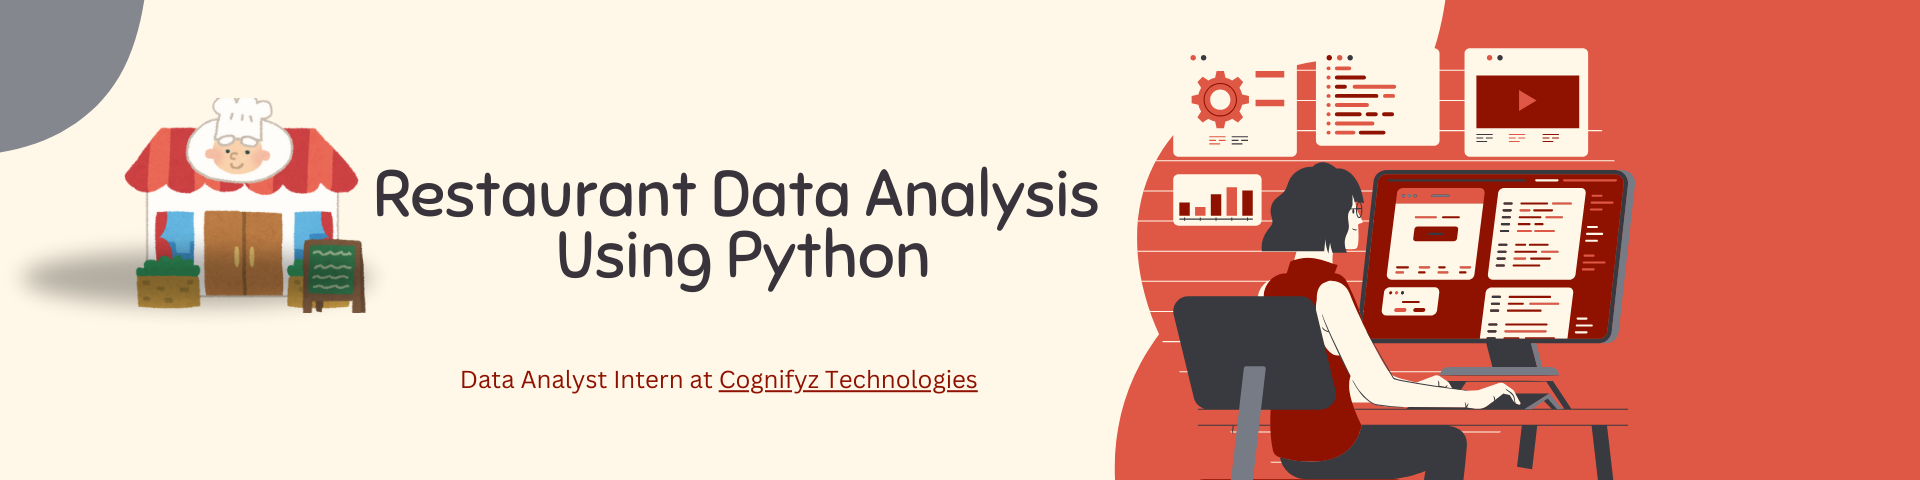

#**Project-Overview**

###*This Project aims to analyze the Dataset which containg Best Restaurant Informations.*
###The goal of analysis such as :

*   **Analyze the text reviews to identify the most common positive and negative keywords and it's legnth.**
*   **Votes Analysis**

*   **Correlation between the number of votes and the rating of a restaurant**






In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = '/content/drive/MyDrive/Dataset .csv' # Path of Dataset from Drive
df = pd.read_csv(path)

In [4]:
df.head() # First Five Datas

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.info() # Information of Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.describe() # Describe of Dataset

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


#**Task 1 : Restaurant Reviews**

##*1.1 : Analyze the text reviews to identify the most common positive and negative keywords.*

In [7]:
from collections import Counter
import re

In [18]:
reviews = df['Rating text'].dropna().tolist()

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower()
    return text

cleaned_reviews = [clean_text(review) for review in reviews]

word_counts = Counter()
for review in cleaned_reviews:
    words = review.split()
    word_counts.update(words)  # Update the counter with the words in the review

most_common_words = word_counts.most_common(10)  # Get the 10 most common words
print(most_common_words)
postive = ['good','excelent']
negative = ['poor', 'not']
print("\nPositive Reviews: ",postive)
print("Negative Reviews: ",negative)

[('average', 3737), ('good', 3179), ('not', 2148), ('rated', 2148), ('very', 1079), ('excellent', 301), ('poor', 186)]

Positive Reviews:  ['good', 'excelent']
Negative Reviews:  ['poor', 'not']


##*1.2 : Calculate the average length of reviews and explore if there is a relationship between review length and rating.*

In [11]:
df['review_length'] = df['Rating text'].dropna().str.len()  # Length of Rating Text
avg_length = df['review_length'].mean()  # Average Length of Rating Text
print(avg_length)

7.020730813527379


In [12]:
rating_length_mean = df.groupby('Rating text')['review_length'].mean().sort_values(ascending = False).reset_index() # Average Length of Rating Text by Rating
rating_length_mean

,Rating text,review_length
0,Excellent,9.0
1,Not rated,9.0
2,Very Good,9.0
3,Average,7.0
4,Good,4.0
5,Poor,4.0


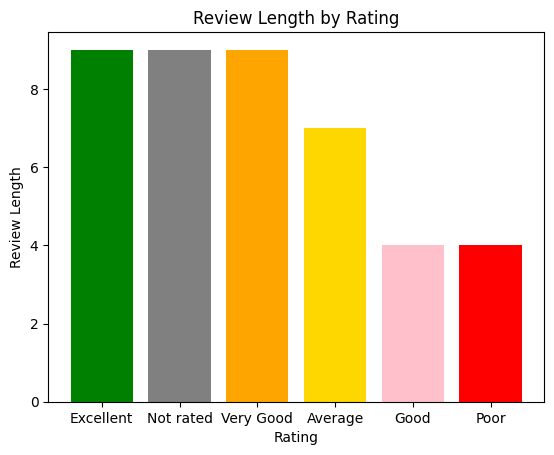

In [13]:
# Visualization of Average Length of Rating Text by Rating
plt.figure.figsize=(5,3)
colors = ['green', 'gray', 'orange', 'gold','pink','red']
plt.bar(rating_length_mean['Rating text'], rating_length_mean['review_length'], color = colors)
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.title('Review Length by Rating')
plt.show()

#**Task 2 : Votes Analysis**

##*2.1 : Identify the restaurants with the highest and lowest number of votes.*

In [14]:
highest_votes = df.groupby('Restaurant Name')['Votes'].max().sort_values(ascending = False).reset_index().nlargest(1, 'Votes')
print(highest_votes)

  Restaurant Name  Votes
0            Toit  10934


In [15]:
lowest_votes = df.groupby('Restaurant Name')['Votes'].min().sort_values(ascending = True).reset_index().nsmallest(1, 'Votes')
print(lowest_votes)

     Restaurant Name  Votes
0  Laxmi Food Corner      0


##*2.1 : Analyze if there is a correlation between the number of votes and the rating of a restaurant.*

In [16]:
num = df[['Aggregate rating','Votes']]
correlation = num.corr().loc['Aggregate rating','Votes'] # Correlation between Aggregate rating and Votes
correlation

0.3136905841954099

A correlation coefficient of 0.313 indicates a weak to moderate positive linear relationship between the rating and votes of restaurants.

* **Positive relationship:** As the number of votes increases, the rating also tends to increase. This suggests that restaurants with more votes tend to have higher ratings.
* **Weak to moderate strength:** The relationship is not extremely strong (which would be close to 1), but it's not negligible either (which would be close to 0). A coefficient of 0.313 indicates that about 31.3% of the variation in ratings can be explained by the number of votes.


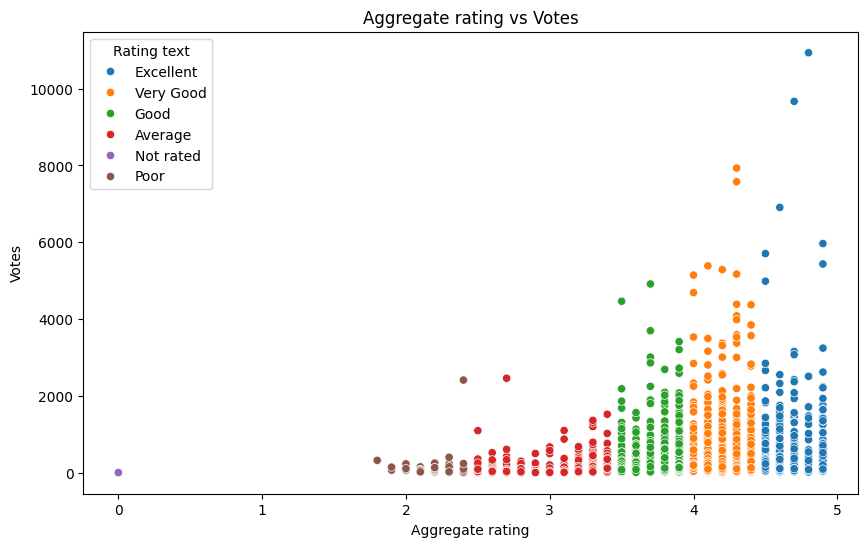

In [17]:
# Visualizationof Aggregate rating, Votes and Seperated by Rating text
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Aggregate rating', y='Votes', data=df, hue ="Rating text")
plt.xlabel('Aggregate rating')
plt.ylabel('Votes')
plt.title('Aggregate rating vs Votes')
plt.show()

#**Conclusion**

###My analysis of restaurant data has provided valuable insights and the text reviews to identify the most common positive and negative keywords for finding the average length of reviews and explore if there is a relationship between review length and rating. Then analysed that, restaurants with the highest and lowest number of votes. also examined if there is a correlation between the number of votes and the rating of a restaurant. These findings can inform restaurant owners, investors, and food enthusiasts, enabling data-driven decisions and a deeper understanding of the restaurant industry's dynamics.





##*Check out the Project on GitHub :* [link text](https://github.com/Shakthi25-dev/Restaurant-Analysis_Using_Python)